In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [3]:
#cargamos los archivos en dataframes separados

df_data_limpia=pd.read_csv('C:/Users/jorge/OneDrive/Escritorio/PI_ML_OPS/DataLimpia.csv')



In [4]:
df_data_limpia.head(2) #ver las filas del dataframe

,id_belongs_to_collection,name_belongs_to_collection,id_genres,name_genres,id_companies,name_companies,iso_3166_1_countries,name_countries,iso_639_1_languages,name_languages,...,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,release_year,return
0,10194.0,Toy Story Collection,"[16, 35, 10751]","['Animation', 'Comedy', 'Family']",[3],['Pixar Animation Studios'],['US'],['United States of America'],['en'],['English'],...,1995-10-30,373554033.0,81.0,Released,NaN,Toy Story,7.7,5415.0,1995,12.45
1,NaN,NaN,"[12, 14, 10751]","['Adventure', 'Fantasy', 'Family']","[559, 2550, 10201]","['TriStar Pictures', 'Teitler Film', 'Intersco...",['US'],['United States of America'],"['en', 'fr']","['English', 'Français']",...,1995-12-15,262797249.0,104.0,Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,1995,4.04


In [5]:
df_data_limpia.info() #informacion sobre las columnas y tipos de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45363 entries, 0 to 45362
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id_belongs_to_collection    4488 non-null   float64
 1   name_belongs_to_collection  4488 non-null   object 
 2   id_genres                   42979 non-null  object 
 3   name_genres                 42979 non-null  object 
 4   id_companies                33570 non-null  object 
 5   name_companies              33570 non-null  object 
 6   iso_3166_1_countries        39154 non-null  object 
 7   name_countries              39154 non-null  object 
 8   iso_639_1_languages         41597 non-null  object 
 9   name_languages              41597 non-null  object 
 10  budget                      45363 non-null  float64
 11  id                          45363 non-null  int64  
 12  original_language           45352 non-null  object 
 13  overview                    444

In [6]:
df_data_limpia.describe() #resumen estadistico de las variables numericas

,id_belongs_to_collection,budget,id,popularity,revenue,runtime,vote_average,vote_count,release_year,return
count,4488.000000,4.536300e+04,45363.000000,45363.000000,4.536300e+04,45117.000000,45363.000000,45363.000000,45363.000000,4.536300e+04
mean,184073.408868,4.233796e+06,108030.387452,2.926515,1.123331e+07,94.178181,5.624064,110.117453,1991.879638,6.602319e+02
std,141630.530505,1.744222e+07,112175.538880,6.010299,6.439890e+07,38.345037,1.915402,491.810701,24.057134,7.470400e+04
min,10.000000,0.000000e+00,2.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1874.000000,0.000000e+00
25%,86026.250000,0.000000e+00,26387.500000,0.388835,0.000000e+00,85.000000,5.000000,3.000000,1978.000000,0.000000e+00
50%,141531.500000,0.000000e+00,59857.000000,1.130302,0.000000e+00,95.000000,6.000000,10.000000,2001.000000,0.000000e+00
75%,294172.000000,0.000000e+00,156556.500000,3.691946,0.000000e+00,107.000000,6.800000,34.000000,2010.000000,0.000000e+00
max,480160.000000,3.800000e+08,469172.000000,547.488298,2.787965e+09,1256.000000,10.000000,14075.000000,2020.000000,1.239638e+07


Exploratory Data Analyst (EDA.)

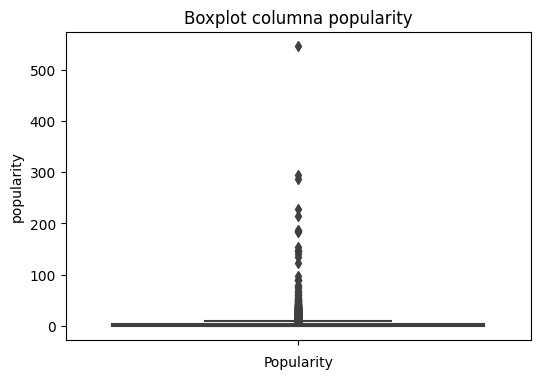

In [7]:
#Destacamos los outliers
#Realizamos un boxplot de la variable 'popularity'
plt.figure(figsize=(6,4))
sns.boxplot(y=df_data_limpia['popularity'])
plt.xlabel('Popularity')
plt.title('Boxplot columna popularity')
plt.show()

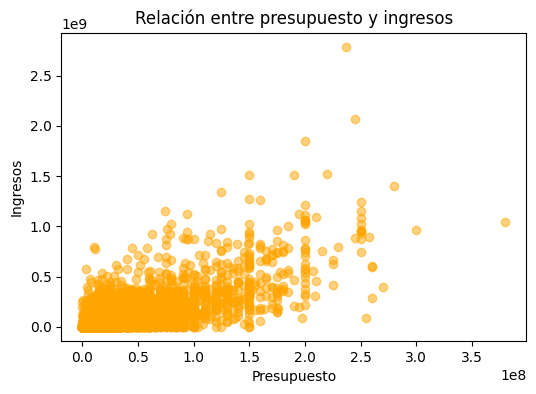

In [8]:
#eliminamos las filas en donde budget es igual a 0
df_clean = df_data_limpia[df_data_limpia['budget'] != 0]
#Patrón interesante,relación entre Budget y Revenue.
plt.figure(figsize=(6,4))
plt.scatter(data=df_clean,x='budget', y='revenue',c='orange',alpha=0.5)
plt.xlabel('Presupuesto')
plt.ylabel('Ingresos')
plt.title('Relación entre presupuesto y ingresos')
plt.show()


In [9]:
correlation = df_data_limpia['budget'].corr(df_data_limpia['revenue'])
print("Coeficiente de correlación:", correlation)

#cercano a 1 posee una correlación pósitiva fuerte  

Coeficiente de correlación: 0.7687589492299838


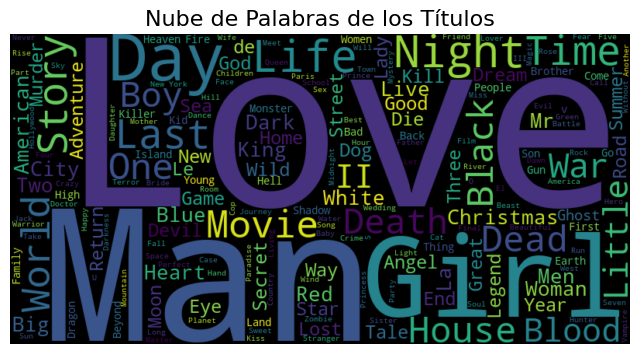

In [10]:
#nube de palabras con las palabras más frecuentes en los títulos de las películas

text = ' '.join(df_data_limpia['title'])  # Unir los títulos en un solo texto separados por espacios

wordcloud = WordCloud(width=800, height=400).generate(text)  # Crear la nube de palabras

plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de los Títulos', fontsize= 16, color='black')
plt.show()


Coeficiente de correlación: 0.15375533489351773


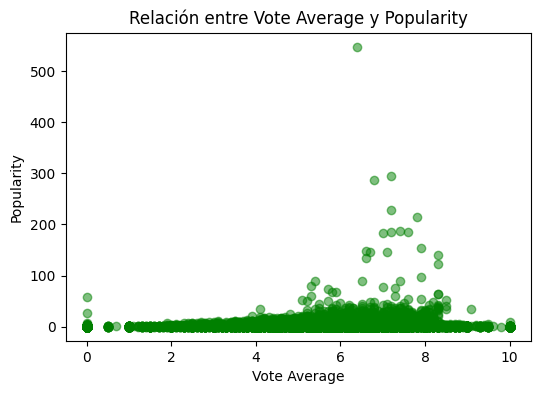

In [11]:
# Correlación entre 'vote_average' y 'popularity'
correlation = df_data_limpia['vote_average'].corr(df_data_limpia['popularity'])
print("Coeficiente de correlación:", correlation)

# Gráfico de dispersión entre 'vote_average' y 'popularity'
plt.figure(figsize=(6, 4))
plt.scatter(data=df_data_limpia, x='vote_average', y='popularity', c= 'green',alpha=0.5)
plt.xlabel('Vote Average')
plt.ylabel('Popularity')
plt.title('Relación entre Vote Average y Popularity')
plt.show()